In [14]:
import scanpy as sc
from pathlib import Path
import pandas as pd

In [15]:
sc.settings.set_figure_params(dpi=100, facecolor="white")

In [16]:
data_file = Path('../data/endometrium_pc.h5ad')
data = sc.read_h5ad(data_file)

menstrual_cycle= ['proliferative', 'early-secretory', 'early-mid-secretory', 'mid-secretory', 'late-secretory']
data.obs['Stage'] = pd.Categorical(data.obs['Stage'],
                                   categories=menstrual_cycle,
                                   ordered=True)

# Nearest neighbor graph

I took 20 PCs, which comes from the PC to variance ration plot in `pc.ipynb`. I experimentally chose the number of neighbors. It is high for the purpose of more general clustering.

In [17]:
sc.pp.neighbors(data,
                n_pcs=20,
                n_neighbors=50,
                method='umap',
                random_state=123)

# UMAP

In [18]:
sc.tl.umap(data, random_state=123)

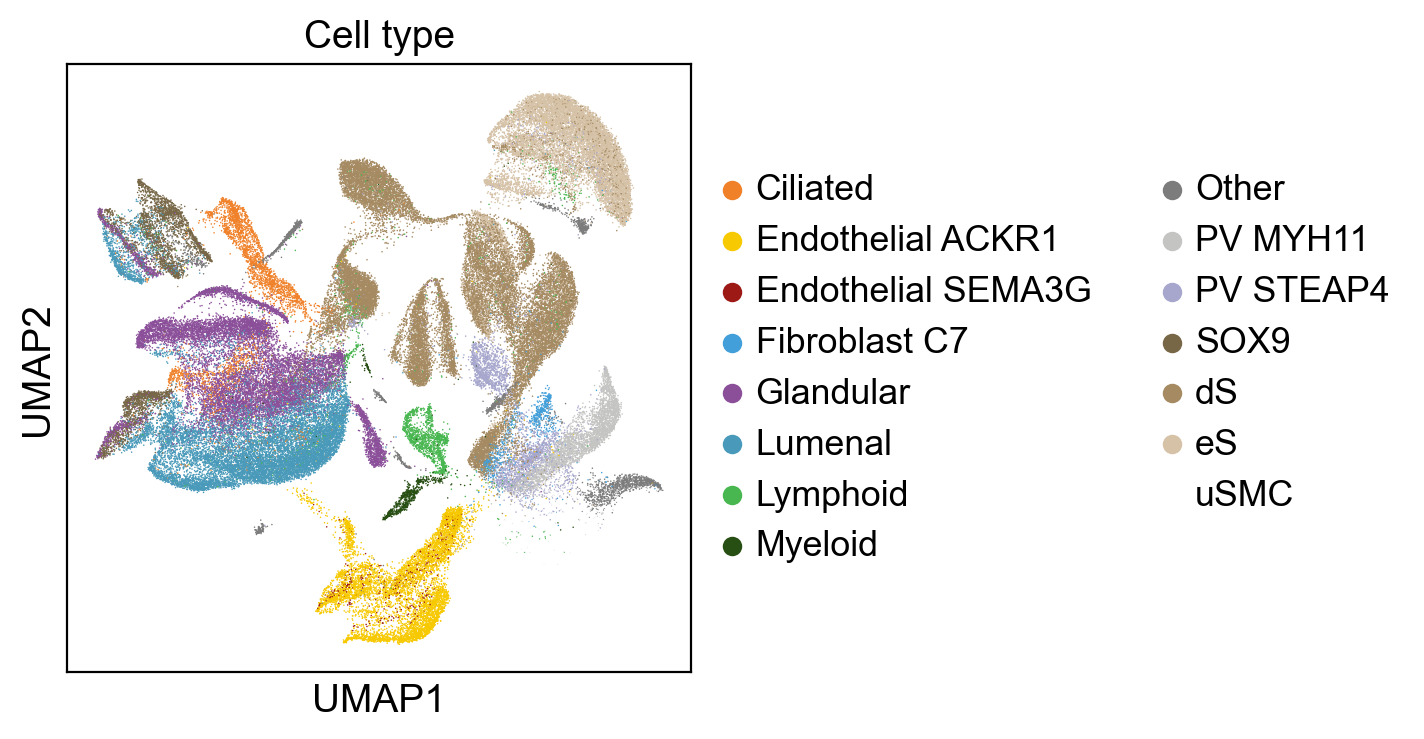

In [19]:
sc.pl.umap(data,
           color='Cell type')

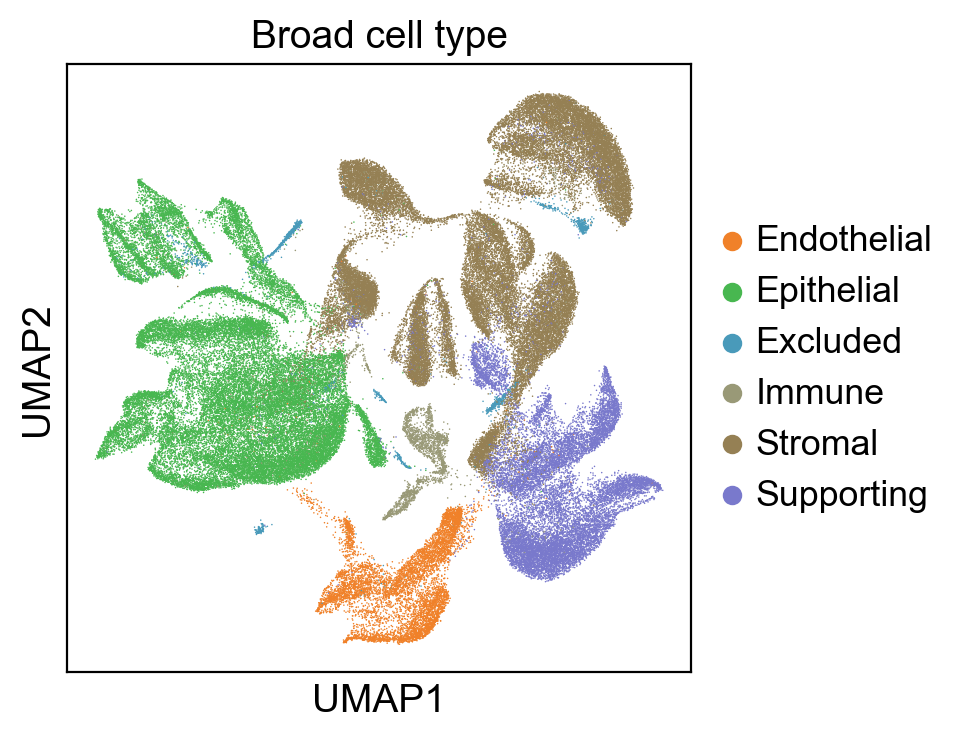

In [20]:
sc.pl.umap(data,
           color='Broad cell type',
           save='_broad_cell_type.png')

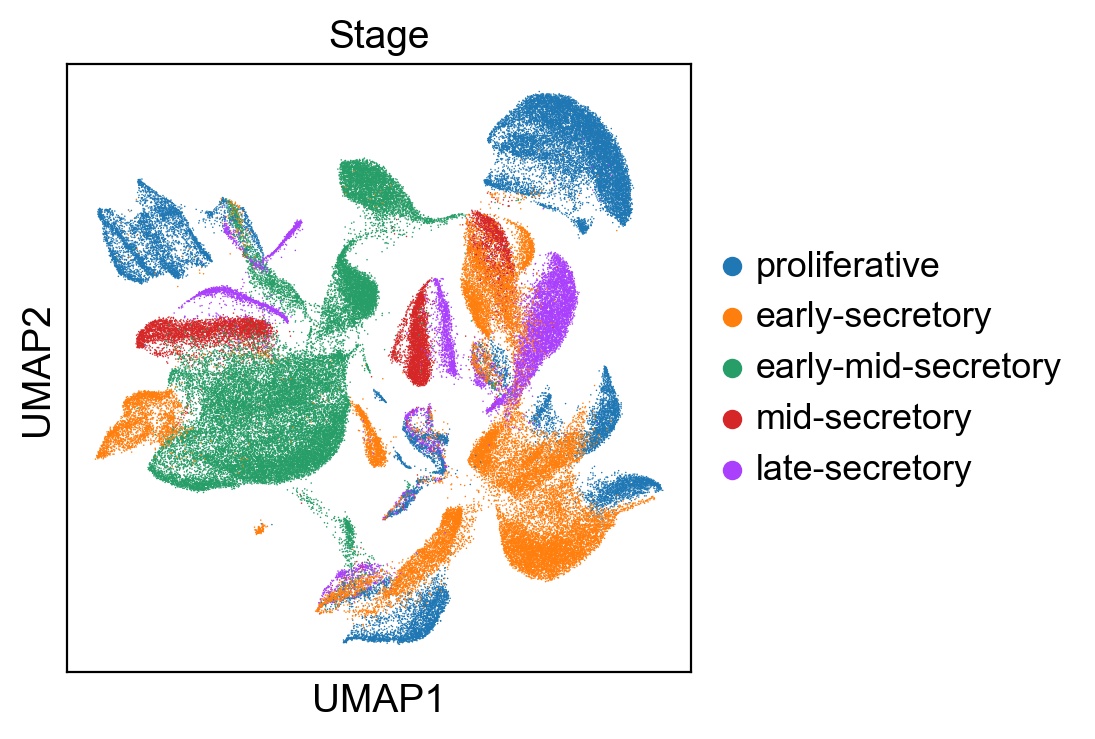

In [21]:
sc.pl.umap(data,
           color='Stage',
           save='_stage.png')

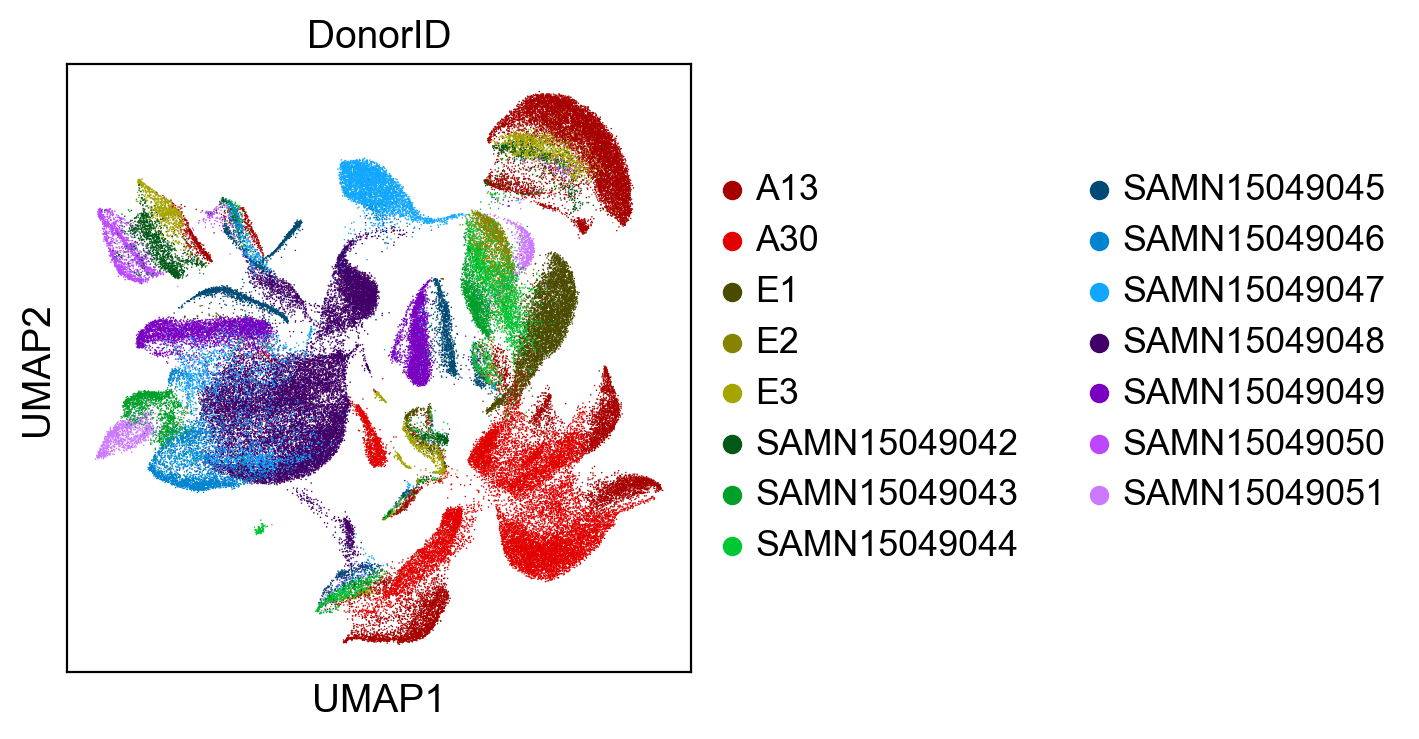

In [22]:
sc.pl.umap(data,
           color='DonorID')

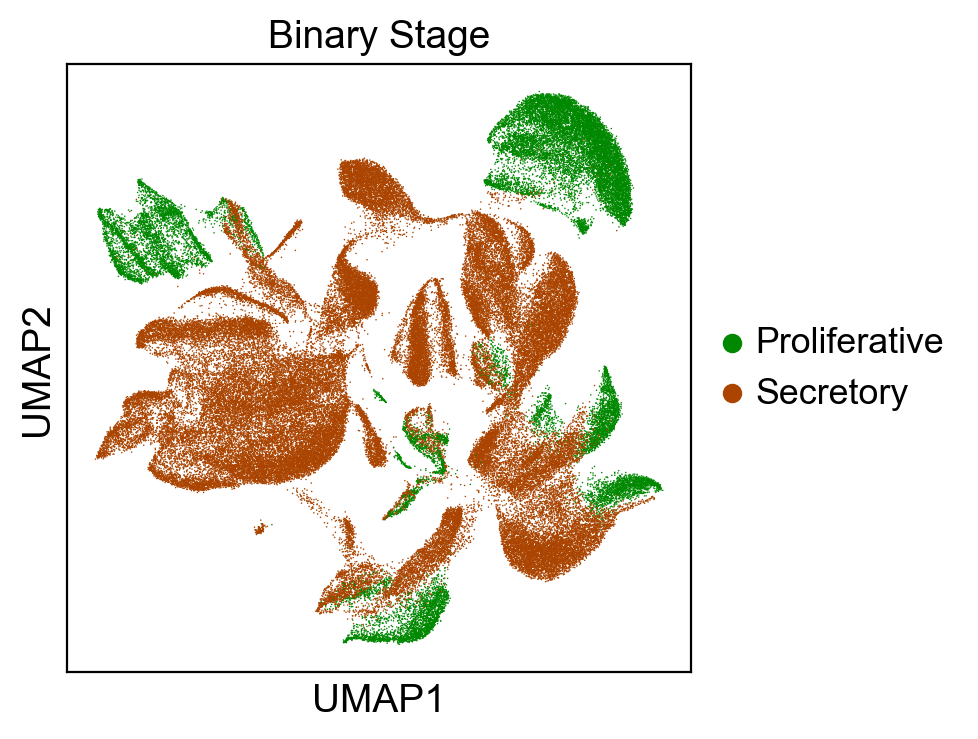

In [23]:
sc.pl.umap(data,
           color='Binary Stage')

# Clustering

Number of iterations is decided by the method. Teh algotithm stops, when it echieves the optimal clustering. I chose the resolution experimentally. I wanted to see, whether it is possible to cluster broad cell type or whether some other variable is more dominant. At resolution 0.016 ther are 5 clusters, which is the number of general cell types, but the two stromal cells subtypes (dS and eS) difference is stronger than the one between endothelial and supporting cells.

C:\Users\maria\AppData\Local\Temp\ipykernel_21248\3224666722.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(data, resolution=0.017)


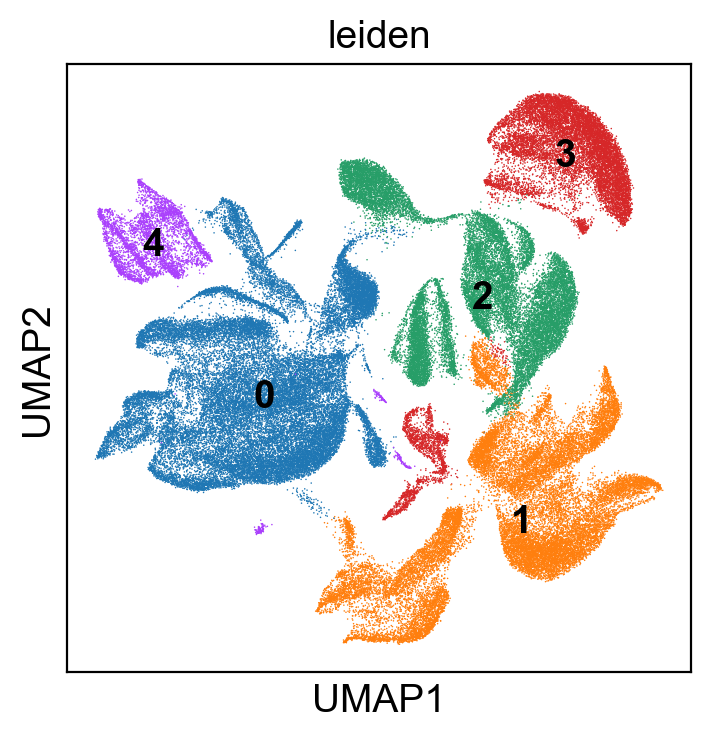

In [24]:
sc.tl.leiden(data, resolution=0.017)
sc.pl.umap(data, color=['leiden'], legend_loc='on data', save='_clustering.png')

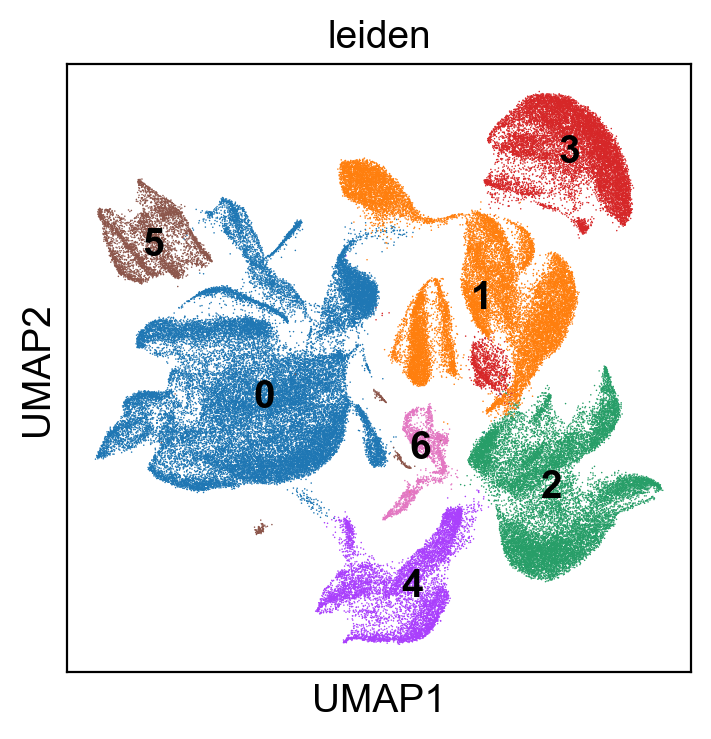

In [25]:
sc.tl.leiden(data, resolution=0.025)
sc.pl.umap(data, color=['leiden'],
           legend_loc='on data')